In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Reading the csv file and getting the dataframe
Traffic_pd=pd.read_csv("Traffic_violations_updated.csv")
Traffic_pd.head()

,Date Of Stop,Time Of Stop,Description,State,Violation Type,Charge,Contributed To Accident,Race,Gender,Geolocation,Year,Month
0,2017-08-29,10:19:00,TRAFFIC CONTROLDEVICE,VA,Citation,21-201(a1),No,WHITE,F,"(38.981725, -77.0927566666667)",2017,8
1,2013-10-08,13:23:00,DRIVING WITH SUSP.LICEN,MD,Citation,16-303,No,HISPANIC,M,"(39.0933833333333, -77.0795516666667)",2013,10
2,2012-03-19,16:10:00,ELECTRONIC DEVICE DISTRACTION,VA,Citation,21-1124,No,HISPANIC,M,"(38.9827307333333, -77.1007551666667)",2012,3
3,2012-06-09,21:19:00,NO SEAT BELT/CHILD SAFTEY,MD,Citation,22-412,No,WHITE,F,"(39.06914295, -76.9696780666667)",2012,6
4,2012-12-20,00:41:00,INFLUENCE OF ALCOHOL,MD,Citation,21-902,No,WHITE,M,"(38.9835782, -77.09310515)",2012,12


In [3]:
#Dropped the gender U and the charges whose value count is less than 31200
New_Traffic_pd=Traffic_pd[Traffic_pd.Gender !='U']
s=New_Traffic_pd.Charge.value_counts().gt(31200)
Traffic_data=New_Traffic_pd.loc[New_Traffic_pd.Charge.isin(s[s].index)]

In [4]:
#function to calculate the warning and citations from the Violation type column
def compute_outcome_stats(df):
 #   """Compute statistics regarding the relative quanties of  warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['Violation Type'] == 'Warning'])
    n_citations = len(df[df['Violation Type'] == 'Citation'])
    try:
        citations_per_warning = n_citations / n_warnings
    except ZeroDivisionError:
        citations_per_warning=0
    

    return(pd.Series(data = {
        'total': n_total,
        'warnings': n_warnings,
        'citations': n_citations,
        'citations_per_warning': citations_per_warning,
        
    }))

In [5]:
#function to compute the analysis of top 5 charges
def compute_outcome_Charges(df):
    """Compute statistics regarding the relative quanties oftop five charges"""
    Total_charges=len(df)
    DRIVING_SUSP_LICEN = len(df[df['Charge'] == '16-303'])
    SPEEDING= len(df[df['Charge'] == '201-801'])
    TRAFFIC_CONTROLDEVICE=len(df[df['Charge'] == '21-201(a1)'])
    ELECTRONIC_DEVICE_DISTRACTION=len(df[df['Charge'] == '21-1124'])
    DISPLAY_REGISTRATION_PLATE=len(df[df['Charge'] == '13-411'])

    return(pd.Series(data = {
        "TOTAL CHARGES":Total_charges,
        'DRIVING WITH SUSP.LICEN':DRIVING_SUSP_LICEN,
        'SPEEDING': SPEEDING,
        'TRAFFIC CONTROLDEVICE': TRAFFIC_CONTROLDEVICE,
        'ELECTRONIC DEVICE DISTRACTION': ELECTRONIC_DEVICE_DISTRACTION,
        'DISPLAY REGISTRATION PLATE':DISPLAY_REGISTRATION_PLATE,
    }))

In [13]:
#dataframe which is groupby gender and race to show charges 
stats =Traffic_data.groupby(['Gender','Race']).apply(compute_outcome_Charges)
stats

TOTAL CHARGES  DRIVING WITH SUSP.LICEN  SPEEDING  \
Gender Race                                                                
F      ASIAN                    21459                     2190      5913   
       BLACK                    98466                    26223     18829   
       HISPANIC                 44242                     9739      9097   
       NATIVE AMERICAN            712                      109       142   
       OTHER                    16364                     2662      4138   
       WHITE                   131567                    19553     37687   
M      ASIAN                    32809                     4315      8580   
       BLACK                   189378                    58369     31450   
       HISPANIC                139833                    41128     21473   
       NATIVE AMERICAN           1402                      309       248   
       OTHER                    32634                     5638      8181   
       WHITE                   212442                    37411     57847   

                        TRAFFIC CONTROLDEVICE  ELECTRONIC DEVICE DISTRACTION  \
Gender Race                                                                    
F      ASIAN                             2905                           1942   
       BLACK                            10775                          10349   
       HISPANIC                          5220                           5400   
       NATIVE AMERICAN                    101                             94   
       OTHER                             2084                           1845   
       WHITE                            17826                          13135   
M      ASIAN                             4003                           3420   
       BLACK                            18027                          21133   
       HISPANIC                         13265                          16818   
       NATIVE AMERICAN                    192                            177   
       OTHER                             3954                           3780   
       WHITE                            23966                          21791   

                        DISPLAY REGISTRATION PLATE  
Gender Race                                         
F      ASIAN                                  1730  
       BLACK                                  9896  
       HISPANIC                               2736  
       NATIVE AMERICAN                          61  
       OTHER                                  1374  
       WHITE                                 11816  
M      ASIAN                                  2635  
       BLACK                                 17398  
       HISPANIC                               8418  
       NATIVE AMERICAN                         122  
       OTHER                                  2571  
       WHITE                                 18790

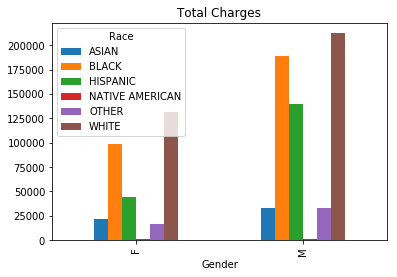

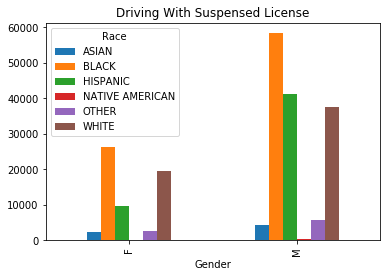

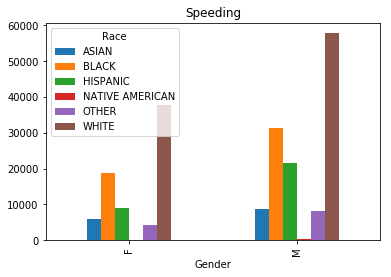

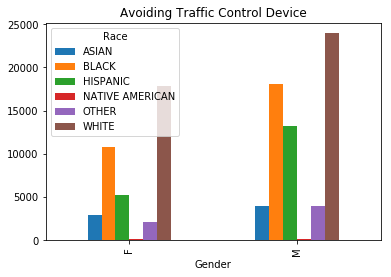

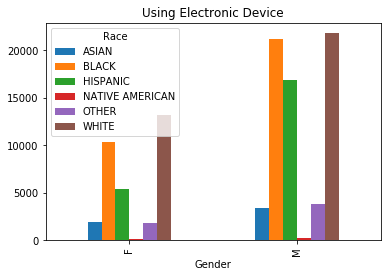

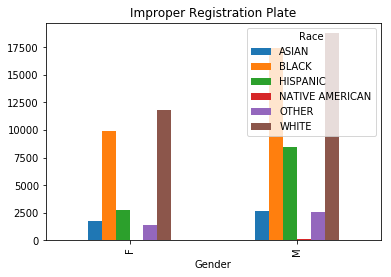

In [12]:
#plotting the above dataframe
stats =Traffic_data.groupby(['Gender','Race']).apply(compute_outcome_Charges).unstack()
figsize=(5,5)
stats.plot.bar(y="TOTAL CHARGES", title='Total Charges')
stats.plot.bar(y='DRIVING WITH SUSP.LICEN',  title='Driving With Suspensed License')
stats.plot.bar(y='SPEEDING',  title='Speeding')
stats.plot.bar(y='TRAFFIC CONTROLDEVICE',  title='Avoiding Traffic Control Device')
stats.plot.bar(y='ELECTRONIC DEVICE DISTRACTION',  title='Using Electronic Device')
stats.plot.bar(y='DISPLAY REGISTRATION PLATE',  title='Improper Registration Plate')


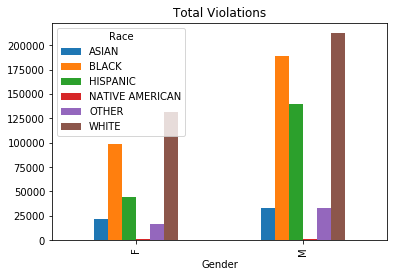

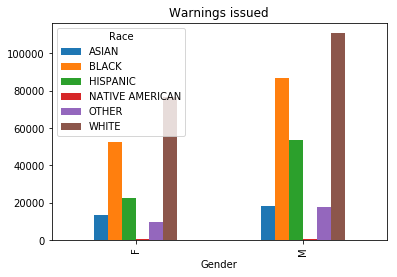

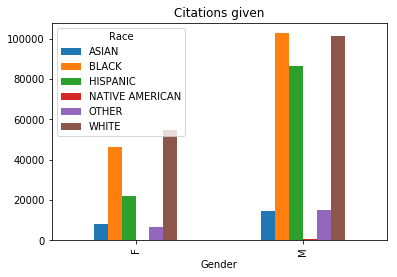

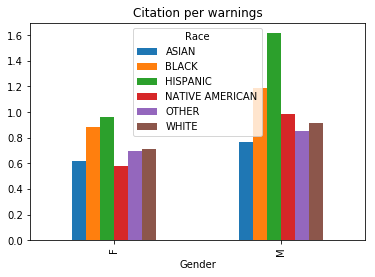

In [16]:
#Dataframe to show violation type on gender and race and plot
by_citation_charge=Traffic_data.groupby(['Gender','Race']).apply(compute_outcome_stats)
by_citation_charge=Traffic_data.groupby(['Gender','Race']).apply(compute_outcome_stats).unstack()
by_citation_charge.plot.bar(y="total", title='Total Violations')
by_citation_charge.plot.bar(y='warnings',  title='Warnings issued')
by_citation_charge.plot.bar(y='citations',  title='Citations given')
by_citation_charge.plot.bar(y='citations_per_warning',  title='Citation per warnings')


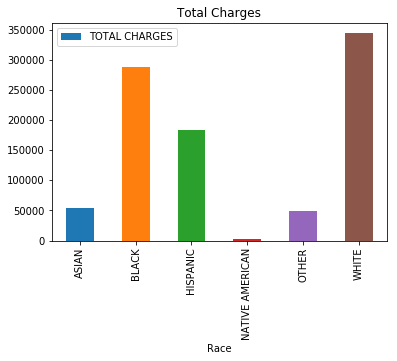

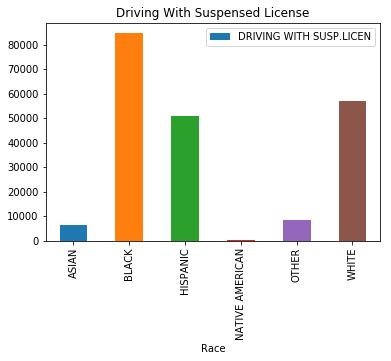

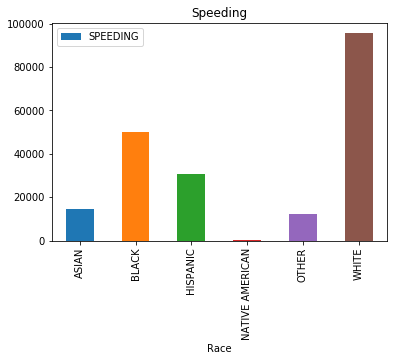

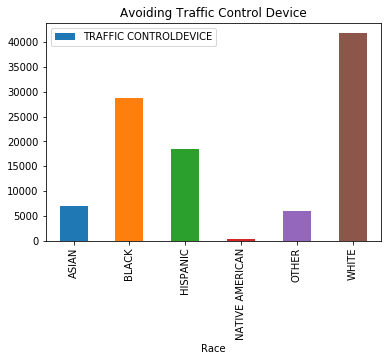

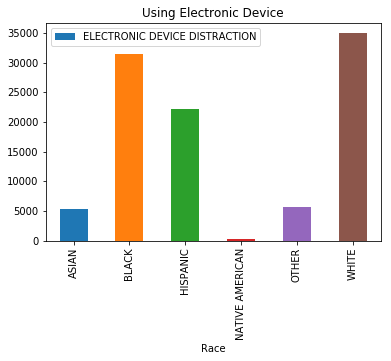

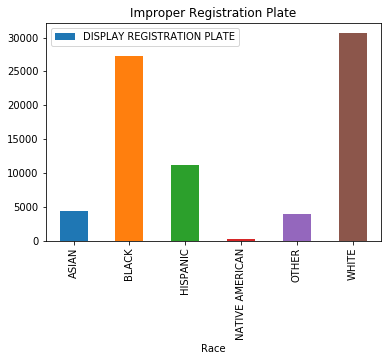

In [24]:
#show inpact by Race
By_Race =Traffic_data.groupby(['Race']).apply(compute_outcome_Charges)

By_Race.plot.bar(y="TOTAL CHARGES", title='Total Charges')
By_Race.plot.bar(y='DRIVING WITH SUSP.LICEN',  title='Driving With Suspensed License')
By_Race.plot.bar(y='SPEEDING',  title='Speeding')
By_Race.plot.bar(y='TRAFFIC CONTROLDEVICE',  title='Avoiding Traffic Control Device')
By_Race.plot.bar(y='ELECTRONIC DEVICE DISTRACTION',  title='Using Electronic Device')
By_Race.plot.bar(y='DISPLAY REGISTRATION PLATE',  title='Improper Registration Plate')


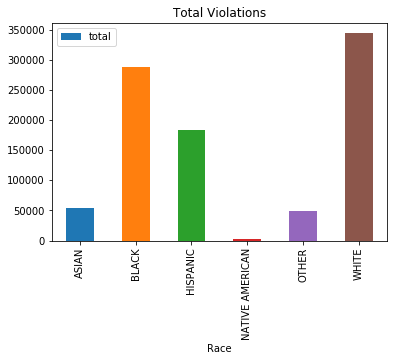

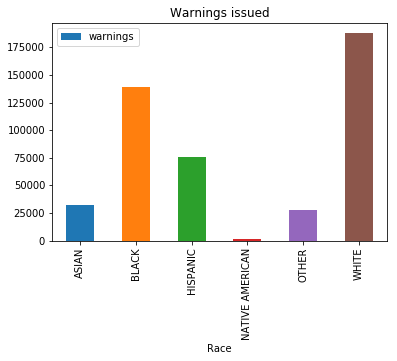

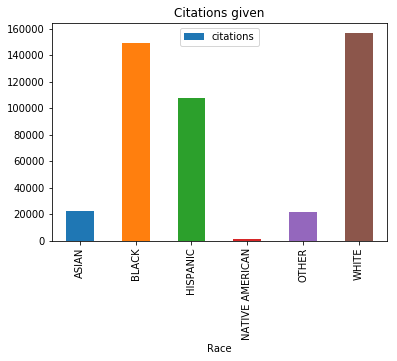

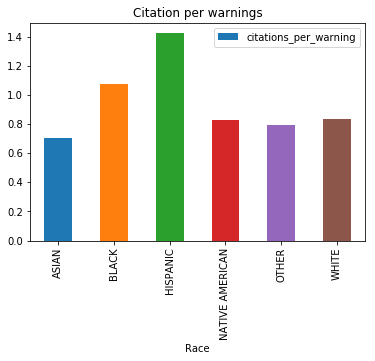

In [23]:
by_race_charge=Traffic_data.groupby(['Race']).apply(compute_outcome_stats)
by_race_charge.plot.bar(y="total", title='Total Violations')
by_race_charge.plot.bar(y='warnings',  title='Warnings issued')
by_race_charge.plot.bar(y='citations',  title='Citations given')
by_race_charge.plot.bar(y='citations_per_warning',  title='Citation per warnings')


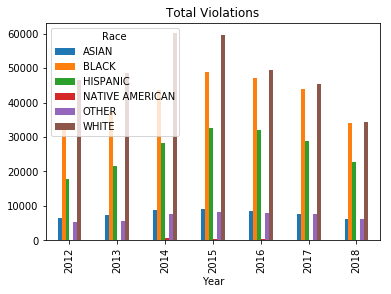

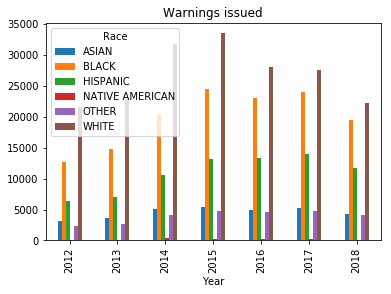

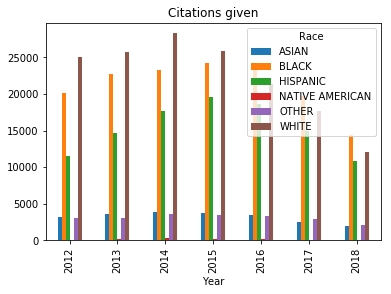

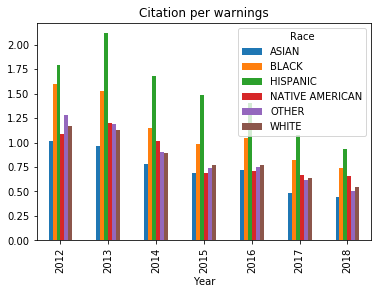

In [31]:
by_year_charge=Traffic_data.groupby(['Year','Race']).apply(compute_outcome_stats).unstack()
by_year_charge
by_year_charge.plot.bar(y="total", title='Total Violations')
by_year_charge.plot.bar(y='warnings',  title='Warnings issued')
by_year_charge.plot.bar(y='citations',  title='Citations given')
by_year_charge.plot.bar(y='citations_per_warning',  title='Citation per warnings')


In [32]:
by_year_charge

total                                                    warnings  \
Race   ASIAN    BLACK HISPANIC NATIVE AMERICAN   OTHER    WHITE    ASIAN   
Year                                                                       
2012  6474.0  32857.0  17934.0            23.0  5411.0  46638.0   3210.0   
2013  7295.0  37586.0  21667.0           238.0  5713.0  48597.0   3711.0   
2014  8934.0  43673.0  28231.0           636.0  7738.0  60081.0   5015.0   
2015  9172.0  48873.0  32742.0           476.0  8249.0  59516.0   5418.0   
2016  8410.0  47080.0  31922.0           323.0  7952.0  49464.0   4883.0   
2017  7770.0  43794.0  28966.0           265.0  7804.0  45364.0   5241.0   
2018  6213.0  33981.0  22613.0           153.0  6131.0  34349.0   4302.0   

                                          ...    citations                  \
Race    BLACK HISPANIC NATIVE AMERICAN    ...     HISPANIC NATIVE AMERICAN   
Year                                      ...                                
2012  12669.0   6423.0            11.0    ...      11511.0            12.0   
2013  14864.0   6955.0           108.0    ...      14709.0           130.0   
2014  20288.0  10535.0           316.0    ...      17654.0           320.0   
2015  24537.0  13122.0           282.0    ...      19544.0           194.0   
2016  22999.0  13272.0           189.0    ...      18601.0           134.0   
2017  23970.0  13951.0           159.0    ...      14978.0           106.0   
2018  19546.0  11650.0            92.0    ...      10920.0            61.0   

                      citations_per_warning                      \
Race   OTHER    WHITE                 ASIAN     BLACK  HISPANIC   
Year                                                              
2012  3037.0  25088.0              1.016822  1.593101  1.792153   
2013  3099.0  25701.0              0.965777  1.528593  2.114881   
2014  3663.0  28300.0              0.780857  1.151321  1.675748   
2015  3503.0  25940.0              0.692876  0.989771  1.489407   
2016  3395.0  21431.0              0.721687  1.045306  1.401522   
2017  2964.0  17682.0              0.481778  0.825991  1.073615   
2018  2056.0  12140.0              0.443980  0.737235  0.937339   

                                          
Race NATIVE AMERICAN     OTHER     WHITE  
Year                                      
2012        1.090909  1.279815  1.164338  
2013        1.203704  1.185539  1.122658  
2014        1.012658  0.899779  0.891142  
2015        0.687943  0.738406  0.773566  
2016        0.708995  0.745335  0.765338  
2017        0.666667  0.612903  0.639517  
2018        0.663043  0.504664  0.547167  

[7 rows x 24 columns]

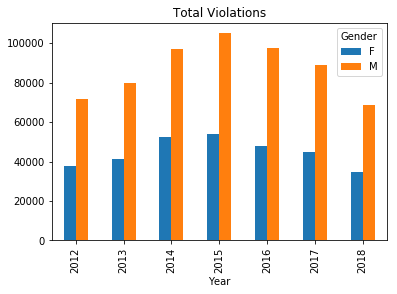

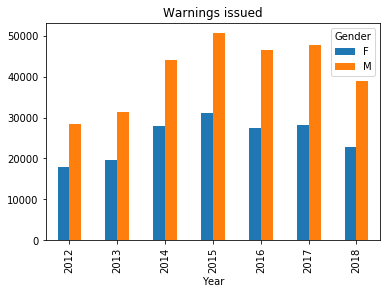

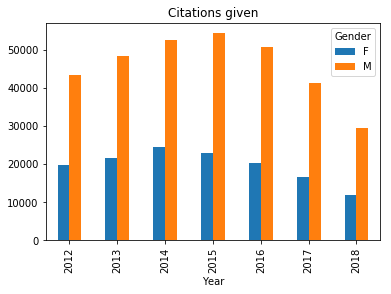

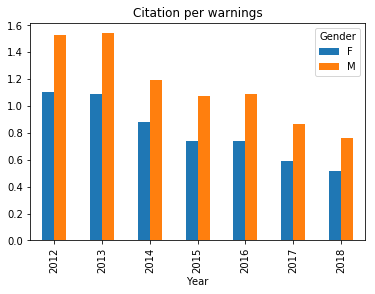

In [33]:
by_year_gender=Traffic_data.groupby(['Year','Gender']).apply(compute_outcome_stats).unstack()

by_year_gender.plot.bar(y="total", title='Total Violations')
by_year_gender.plot.bar(y='warnings',  title='Warnings issued')
by_year_gender.plot.bar(y='citations',  title='Citations given')
by_year_gender.plot.bar(y='citations_per_warning',  title='Citation per warnings')